<a href="https://colab.research.google.com/github/venkatrahul2003/LieDetection/blob/main/Lie_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.


In [ ]:
!sudo apt -y install libportaudio2
!pip install -q tflite-model-maker

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 0s (852 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
d

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
image_path = '/content/drive/MyDrive/ds'

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

In [ ]:
from numpy import array
from sklearn.model_selection import KFold

In [ ]:
model = image_classifier.create(train_data)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
123/123 [==============================] - 697s 6s/step - loss: 0.2944 - accuracy: 0.9576
Epoch 2/5
123/123 [==============================] - 243s 2s/step - loss: 0.2181 - accuracy: 0.9987
Epoch 3/5
123/123 [================

In [ ]:
model.export(export_dir='.')


/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
test_data='/content/drive/MyDrive/q1'

In [ ]:
loss, accuracy = model.evaluate(test_data)

In [ ]:
data = DataLoader.from_folder(image_path)

In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

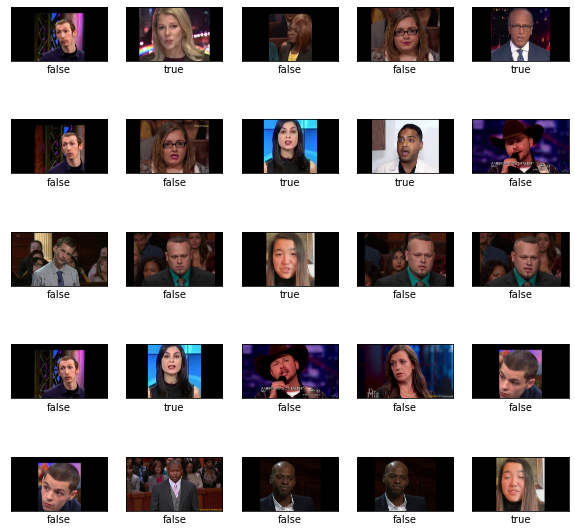

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________


In [ ]:
test_data='/content/drive/MyDrive/q1'

In [ ]:
image_path = '/content/drive/MyDrive/j'

In [ ]:
data = DataLoader.from_folder(image_path)

In [ ]:

train_data, test_data = data.split(0.9)

In [ ]:
loss, accuracy = model.evaluate(test_data)

1/1 [==============================] - 1s 587ms/step - loss: 0.4873 - accuracy: 1.0000


In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
z# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()



In [ ]:
model.evaluate_tflite('model.tflite', test_data)

{'accuracy': 1.0}

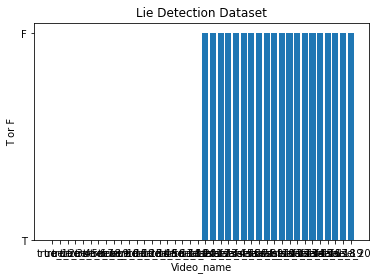

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Reading the tips.csv file
data = pd.read_csv('/content/train.csv')

# initializing the data
x = data['video_name']
y = data['tag']

# plotting the data
plt.bar(x, y)

# Adding title to the plot
plt.title("Lie Detection Dataset")

# Adding label on the y-axis
plt.ylabel('T or F')

# Adding label on the x-axis
plt.xlabel('Video_name')

plt.show()

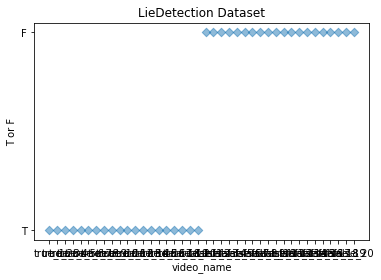

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Reading the tips.csv file
data = pd.read_csv('/content/train.csv')

# initializing the data
x = data['video_name']
y = data['tag']

# plotting the data
plt.scatter(x, y,
            marker='D', alpha=0.5)

# Adding title to the plot
plt.title("LieDetection Dataset")

# Adding label on the y-axis
plt.ylabel('T or F')

# Adding label on the x-axis
plt.xlabel('video_name')

plt.show()